In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.datasets import load_boston,load_breast_cancer
import warnings
warnings.filterwarnings("ignore")

# Soru 1:
Create regression and classification models with Random Forest using the data sets you use in the second project regression project and the third project classification project and find out the optimum parameter values for these models. You can use the cross-validation methods you learned in the previous section.

#### Regression Models with Random Forest

In [2]:
boston=load_boston()
df_boston=pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston["target"]=boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
Y=df_boston["target"]
X=df_boston.iloc[:,:13]

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [5]:
from sklearn.metrics import mean_squared_error

forest=RandomForestRegressor(n_estimators=25,
                             random_state=2)

forest.fit(X_train,Y_train)
y_pred=forest.predict(X_test)

In [6]:
rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
print("rmse of the regression forest: {:.4f} ".format(rmse))

rmse of the regression forest: 3.1036 


In [8]:
param_reg_forest={"n_estimators":[10,20,30],
                  "criterion ":["mse","mae"],
                  "max_depth":np.arange(1,7,1)
                 }

cv_reg=GridSearchCV(estimator=forest,
                    param_grid=param_reg_forest,
                    cv=10
                   )

cv_reg.fit(X,Y)
print("Best parameters: ", cv_reg.best_params_)

#### The most important features with classification

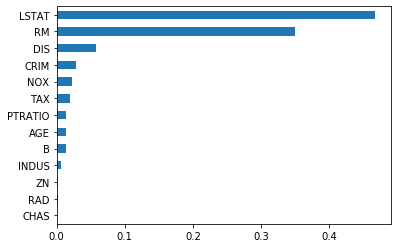

In [52]:
feature=pd.Series(data=forest.feature_importances_, index=X_train.columns)
feature_sort=feature.sort_values(ascending=True)
feature_sort.plot(kind="barh")


# According to plot, the most important feature is "LSTAT"

#### Classification Model with Random Forest

In [9]:
cancer=load_breast_cancer()
df_cancer=pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer["target"]=cancer.target
df_cancer.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [10]:
Y_c=df_cancer["target"]
X_c=df_cancer.iloc[:,:30]

In [11]:
X_c_train, X_c_test, Y_c_train, Y_c_test = train_test_split(X_c, Y_c, test_size=0.20, random_state=42)

In [12]:
forest_class=RandomForestClassifier(n_estimators=25,
                                   criterion="entropy",
                                   max_depth=5
                                   )

forest_class.fit(X_c_train,Y_c_train)

y_c_pred=forest_class.predict(X_c_test)

In [13]:
print("Accuracy of the classification with random forest: ", forest_class.score(X_c_test,Y_c_test))
print("Accuracy of the classification with random forest: ", accuracy_score(Y_c_test,y_c_pred))

Accuracy of the classification with random forest:  0.9649122807017544
Accuracy of the classification with random forest:  0.9649122807017544


#### The most important features with classification

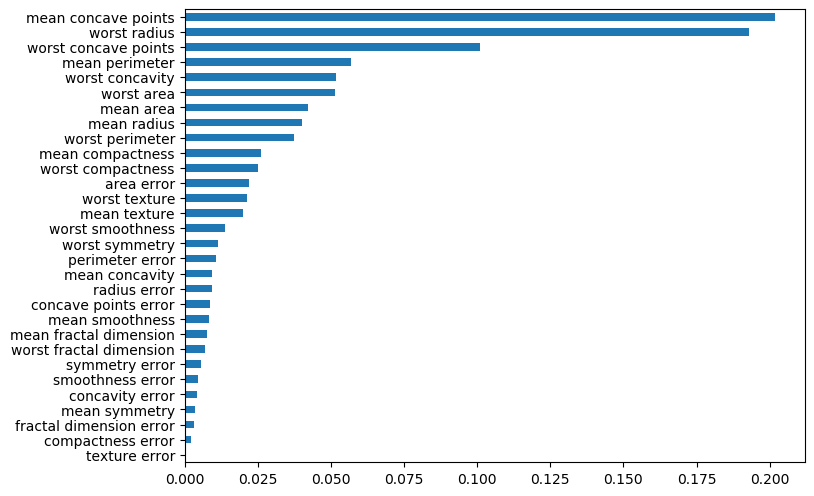

In [50]:
feature_class=pd.Series(data=forest_class.feature_importances_,
                        index=X_c_train.columns)

feature_class_sorted=feature_class.sort_values(ascending=True)

plt.figure(figsize=(8,6), dpi=100)
feature_class_sorted.plot(kind="barh")

# Soru 2:
What is the benefit of out-of-bag evaluation?

* In random forests, there is no need for cross-validation or a separate test set to get an unbiased estimate of the test set error. It is estimated internally, during the run, as follows:

* Each tree is constructed using a different bootstrap sample from the original data. About one-third of the cases are left out of the bootstrap sample and not used in the construction of the kth tree.

* Put each case left out in the construction of the kth tree down the kth tree to get a classification. In this way, a test set classification is obtained for each case in about one-third of the trees. At the end of the run, take j to be the class that got most of the votes every time case n was oob. The proportion of times that j is not equal to the true class of n averaged over all cases is the oob error estimate. This has proven to be unbiased in many tests.
* The models aggregated for the out-of-bag error will only be independent, if there is no dependence between the input data rows.
* The out-of-bag error is not exactly the same (less trees for aggregating, more training case copies) as a cross validation error, but for practical purposes it is close enough.
* Like cross-validation, performance estimation using out-of-bag samples is computed using data that were not used for learning. If the data have been processed in a way that transfers information across samples, the estimate will (probably) be biased. Simple examples that come to mind are performing feature selection or missing value imputation. In both cases (and especially for feature selection) the data are transformed using information from the whole data set, biasing the estimate.

# Soru 3:
Explain the hyperparameters that you can use in Random Forest Classification?

In [15]:
parametreler={"n_estimators":[25,40],
             "criterion":["gini","entropy"],
             "max_depth":[2,4]
             }

grid=GridSearchCV(estimator=forest_class,
                 param_grid=parametreler,
                 cv=100)
grid.fit(X_c,Y_c)

print("The best parameters for classification random forest:", grid.best_params_)
print("The best scores for classification random forest:", grid.best_score_)

The best parameters for classification random forest: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 40}
The best scores for classification random forest: 0.9666666666666667
